In [2]:
import json
import pandas as pd

In [3]:
# all_tweets.to_csv('trending_tweets.tsv',sep='\t',index=False)

## Ran a background script to download tweets that had consumer related hashtags like #consumer, # consumerelectronics,..etc Then loaded the saved file here

In [9]:
all_tweets = pd.read_csv("raw_tweets.tsv",sep='\t')

In [10]:
all_tweets

,text,Timestamp
0,RT @chauvinjl: #ÇaRepartici https://t.co/ConMA...,Sat May 23 06:28:02 +0000 2020
1,"Through the TV programme, Save the Children te...",Sat May 23 06:28:02 +0000 2020
2,"RT @420ArmyGuy: ""Education is for improving th...",Sat May 23 06:28:04 +0000 2020
3,RT @oc_anna: El #Staycation la modalidad de va...,Sat May 23 06:28:04 +0000 2020
4,Heartening!\n\nMissing training! Whether or no...,Sat May 23 06:28:06 +0000 2020
...,...,...
9995,New proof #Hints at the Galaxy Advise 20+ havi...,Sat May 23 10:52:24 +0000 2020
9996,💉COMMAND INJECTION 💉\n#commands #commandinject...,Sat May 23 10:52:24 +0000 2020
9997,"Look happy, healthy...but could be improved sl...",Sat May 23 10:52:24 +0000 2020
9998,RT @WCommoners: WW2 Military History Round Tab...,Sat May 23 10:52:26 +0000 2020


## Cleaning the twitter text

In [68]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
import re
import lxml
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, "html.parser")  # "lxml"
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    lower_case = re.sub(r'(?<![a-zA-Z])rt(?![a-z-Z])', ' ', lower_case)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [69]:
all_tweets['clean_text'] = all_tweets['text'].apply(lambda x: tweet_cleaner(x))

In [70]:
all_tweets

,text,Timestamp,clean_text,pos_tags,verbs
0,RT @chauvinjl: #ÇaRepartici https://t.co/ConMA...,Sat May 23 06:28:02 +0000 2020,arepartici,"[(arepa, NN), (ici, NN)]",[]
1,"Through the TV programme, Save the Children te...",Sat May 23 06:28:02 +0000 2020,through the tv programme save the children tea...,"[(tv, NN), (programme, NN), (save, VBP), (chil...",[]
2,"RT @420ArmyGuy: ""Education is for improving th...",Sat May 23 06:28:04 +0000 2020,education is for improving the lives of others...,"[(education, NN), (improving, VBG), (lives, VB...","[(improving, VBG), (leaving, VBG)]"
3,RT @oc_anna: El #Staycation la modalidad de va...,Sat May 23 06:28:04 +0000 2020,anna el staycation la modalidad de vacaciones ...,"[(anna, NN), (el, VBZ), (staycation, NN), (la,...",[]
4,Heartening!\n\nMissing training! Whether or no...,Sat May 23 06:28:06 +0000 2020,heartening missing training whether or not i w...,"[(hea, NN), (ening, VBG), (missing, VBG), (tra...","[(ening, VBG), (missing, VBG), (training, VBG)]"
...,...,...,...,...,...
9995,New proof #Hints at the Galaxy Advise 20+ havi...,Sat May 23 10:52:24 +0000 2020,new proof hints at the galaxy advise having a ...,"[(new, JJ), (proof, NN), (hints, NNS), (galaxy...",[]
9996,💉COMMAND INJECTION 💉\n#commands #commandinject...,Sat May 23 10:52:24 +0000 2020,command injection commands commandinjection ka...,"[(command, NN), (injection, NN), (commands, VB...","[(cprogramming, VBG)]"
9997,"Look happy, healthy...but could be improved sl...",Sat May 23 10:52:24 +0000 2020,look happy healthy but could be improved sligh...,"[(look, NN), (happy, JJ), (healthy, JJ), (coul...",[]
9998,RT @WCommoners: WW2 Military History Round Tab...,Sat May 23 10:52:26 +0000 2020,ww military history round table let s discuss ...,"[(ww, JJ), (military, JJ), (history, NN), (rou...","[(elearning, VBG)]"


In [71]:
# Downloading list of stopwords.
import nltk
nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Deploying the Part of Speech Tagger

In [72]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english')) 
  

def pos_tag(txt):
  
    tokenized = sent_tokenize(txt) 
    for i in tokenized: 

        # Word tokenizers is used to find the words  
        # and punctuation in a string 
        wordsList = nltk.word_tokenize(i) 

        # removing stop words from wordList 
        wordsList = [w for w in wordsList if not w in stop_words]  

        #  Using a Tagger. Which is part-of-speech  
        # tagger or POS-tagger.  
        tagged = nltk.pos_tag(wordsList) 

#         print(tagged) 
        return tagged

In [73]:
all_tweets['pos_tags'] = all_tweets['clean_text'].apply(lambda x: pos_tag(x))

In [74]:
all_tweets

,text,Timestamp,clean_text,pos_tags,verbs
0,RT @chauvinjl: #ÇaRepartici https://t.co/ConMA...,Sat May 23 06:28:02 +0000 2020,arepartici,"[(arepartici, NN)]",[]
1,"Through the TV programme, Save the Children te...",Sat May 23 06:28:02 +0000 2020,through the tv programme save the children tea...,"[(tv, NN), (programme, NN), (save, VBP), (chil...",[]
2,"RT @420ArmyGuy: ""Education is for improving th...",Sat May 23 06:28:04 +0000 2020,education is for improving the lives of others...,"[(education, NN), (improving, VBG), (lives, VB...","[(improving, VBG), (leaving, VBG)]"
3,RT @oc_anna: El #Staycation la modalidad de va...,Sat May 23 06:28:04 +0000 2020,anna el staycation la modalidad de vacaciones ...,"[(anna, NN), (el, VBZ), (staycation, NN), (la,...",[]
4,Heartening!\n\nMissing training! Whether or no...,Sat May 23 06:28:06 +0000 2020,heartening missing training whether or not i w...,"[(heartening, VBG), (missing, VBG), (training,...","[(ening, VBG), (missing, VBG), (training, VBG)]"
...,...,...,...,...,...
9995,New proof #Hints at the Galaxy Advise 20+ havi...,Sat May 23 10:52:24 +0000 2020,new proof hints at the galaxy advise having a ...,"[(new, JJ), (proof, NN), (hints, NNS), (galaxy...",[]
9996,💉COMMAND INJECTION 💉\n#commands #commandinject...,Sat May 23 10:52:24 +0000 2020,command injection commands commandinjection ka...,"[(command, NN), (injection, NN), (commands, VB...","[(cprogramming, VBG)]"
9997,"Look happy, healthy...but could be improved sl...",Sat May 23 10:52:24 +0000 2020,look happy healthy but could be improved sligh...,"[(look, NN), (happy, JJ), (healthy, JJ), (coul...",[]
9998,RT @WCommoners: WW2 Military History Round Tab...,Sat May 23 10:52:26 +0000 2020,ww military history round table let s discuss ...,"[(ww, JJ), (military, JJ), (history, NN), (rou...","[(elearning, VBG)]"


## Extracting Verbs which refer to actions

In [75]:
## VBG is one of the verb part of speech tags
verb_tags = {'VBG':1}

def extract_verbs(pos_tags):
    global verb_tags
    verbs=[]
    if not pos_tags:
        return []
    for tag in pos_tags:
        if tag[1] in verb_tags:
            verbs.append(tag) # tag[0]
    return verbs
        

In [76]:
all_tweets['verbs'] = all_tweets['pos_tags'].apply(lambda x: extract_verbs(x))

In [77]:
all_tweets.sample(10)

,text,Timestamp,clean_text,pos_tags,verbs
4376,Check out Huawei Watch GT 2e Active(Mint Green...,Sat May 23 08:20:26 +0000 2020,check out huawei watch gt e active mint green ...,"[(check, VB), (huawei, NN), (watch, NN), (gt, ...",[]
8895,@mainichi https://t.co/wDoNaVzl9D\n登録 https://...,Sat May 23 10:24:21 +0000 2020,money business sales marketing dream,"[(money, NN), (business, NN), (sales, NNS), (m...",[]
3076,RT @dgx9zr: https://t.co/gm5jmJ9FPX\n#ecommerc...,Sat May 23 07:45:57 +0000 2020,ecommerce marketing business entrepreneur digi...,"[(ecommerce, NN), (marketing, NN), (business, ...","[(digitalmarketing, VBG), (onlineshopping, VBG)]"
5536,19.#aafaque_ehsens_ideamines_sites Please visi...,Sat May 23 08:54:45 +0000 2020,aafaque ehsens ideamines sites please visit ex...,"[(aafaque, NN), (ehsens, VBZ), (ideamines, NNS...",[]
8946,@maimai_22120 https://t.co/wDoNaVzl9D\n登録 http...,Sat May 23 10:25:53 +0000 2020,money business sales marketing dream,"[(money, NN), (business, NN), (sales, NNS), (m...",[]
4107,On #Education: I empathized with school entrep...,Sat May 23 08:13:42 +0000 2020,on education i empathized with school entrepre...,"[(education, NN), (empathized, VBD), (school, ...","[(facing, VBG), (adjusting, VBG)]"
793,RT @SmartCryptoNew1: Cold Wallet Company Balle...,Sat May 23 06:52:39 +0000 2020,cold wallet company ballet introduces new prod...,"[(cold, JJ), (wallet, NN), (company, NN), (bal...",[]
282,RT @Fisheyebox: Vision of #AI !\n\n#DataAnalyt...,Sat May 23 06:35:44 +0000 2020,vision of ai dataanalytics machinelearning ana...,"[(vision, NN), (ai, NN), (dataanalytics, NNS),...","[(machinelearning, VBG)]"
2668,RT @Paul190777: The Human Impact on Woodland a...,Sat May 23 07:34:31 +0000 2020,the human impact on woodland and countryside p...,"[(human, JJ), (impact, NN), (woodland, NN), (c...",[]
5411,#Health #Happy #Life New Jimmy Choo JC 105 FA3...,Sat May 23 08:50:19 +0000 2020,health happy life new jimmy choo jc fa black p...,"[(health, NN), (happy, JJ), (life, NN), (new, ...",[]


## Appending verbs to a list then sorting them descendingly by their occurence frequencey in all tweets

In [78]:
actions = []
for _, row in all_tweets.iterrows():
    for verb in row['verbs']:
        actions.append(verb)

In [79]:
len(actions)

4201

In [80]:
action_dict = {}
for action in actions:
    if action not in action_dict:
        action_dict[action] = 1
    else:
        action_dict[action] +=1

In [81]:
action_dict_sorted = sorted(action_dict.items(), key=lambda x: x[1], reverse=True)

## Here we have a combination of actions, trends and some random words. You will need to go through the list and pick some actions that make sense.

In [82]:
action_dict_sorted

[(('learning', 'VBG'), 129),
 (('digitalmarketing', 'VBG'), 115),
 (('looking', 'VBG'), 85),
 (('elearning', 'VBG'), 83),
 (('using', 'VBG'), 80),
 (('coding', 'VBG'), 78),
 (('working', 'VBG'), 75),
 (('making', 'VBG'), 75),
 (('going', 'VBG'), 73),
 (('programming', 'VBG'), 71),
 (('marketing', 'VBG'), 71),
 (('machinelearning', 'VBG'), 58),
 (('adding', 'VBG'), 46),
 (('fasting', 'VBG'), 43),
 (('amazing', 'VBG'), 41),
 (('coming', 'VBG'), 39),
 (('training', 'VBG'), 35),
 (('growthhacking', 'VBG'), 34),
 (('racing', 'VBG'), 31),
 (('wellbeing', 'VBG'), 29),
 (('advertising', 'VBG'), 29),
 (('growing', 'VBG'), 28),
 (('hiring', 'VBG'), 28),
 (('getting', 'VBG'), 27),
 (('shopping', 'VBG'), 27),
 (('creating', 'VBG'), 26),
 (('changing', 'VBG'), 26),
 (('trending', 'VBG'), 26),
 (('socialmediamarketing', 'VBG'), 25),
 (('fighting', 'VBG'), 24),
 (('investing', 'VBG'), 24),
 (('blogging', 'VBG'), 24),
 (('teaching', 'VBG'), 24),
 (('testing', 'VBG'), 23),
 (('branding', 'VBG'), 23),
 

## Here I was trying to detect top common words/industries or major events like Covid

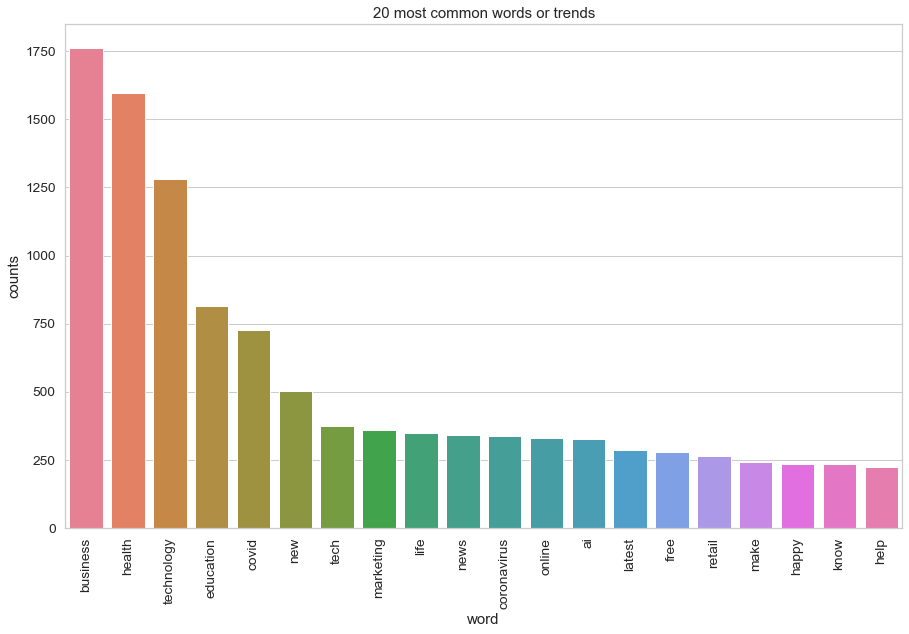

In [83]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words or trends')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('word')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(all_tweets['clean_text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
# references (reused some code from these sources):
    
# https://medium.com/@jaimezornoza/downloading-data-from-twitter-using-the-streaming-api-3ac6766ba96c
    
# https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
